# 神经网络

$$
y = 
\begin{cases}
0 & (b+w_1x_1+w_2x_2 \leqslant 0) \\
1 & (b+w_1x_1+w_2x_2 \gt 0) \\
\end{cases}
$$

$$
\begin{equation}
\begin{aligned}
令 y &= h(b+w_1x_1+w_2x_2) \\
h(x) &=
\begin{cases}
0 & (x\leqslant 0) \\
1 & (x\gt 0) \\
\end{cases}
\end{aligned}
\end{equation}
$$


## 激活函数
$h(x)$称为激活函数

上面的例子中激活函数是一个阶跃函数，神经网络中还有经常使用的一个激活函数就是sigmoid函数
$$
h(x) = \frac{1}{1+e^{-x}}
$$

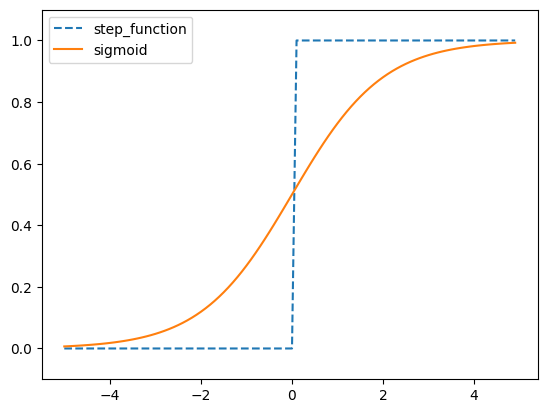

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  y = x > 0
  return y.astype(int)

def sigmoid(x):
  return 1/(1+np.exp(x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(-x)

plt.plot(x, y1, linestyle="--", label="step_function")
plt.plot(x, y2, label="sigmoid")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

> 相对于阶跃函数只能返回0或1，sigmoid函数可以返回0.731等实数（这一点和刚才的平滑性有关）。也就是说，感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号
两者均为非线性函数。神经网络的激活函数必须使用非线性函数

ReLU（Rectified Linear Unit）函数也是一种常用的激活函数
$$
\begin{aligned}
h(x) &=
\begin{cases}
x & (x\gt 0) \\
0 & (x\leqslant 0) \\
\end{cases}
\end{aligned}
$$


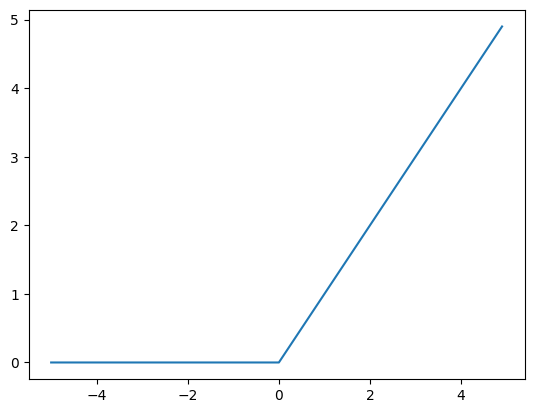

In [33]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 输出层的设计
> 输出层所用的激活函数，要根据求解问题的性质决定。一般地:
> - 回归问题可以使用恒等函数
> - 二元分类问题可以使用sigmoid函数
> - 多元分类问题可以使用softmax函数

softmax函数：
$$
y_k = \frac{e^{a_k}}{\sum_{i=1}^{n}e^{a_i}}
$$

表示假设输出层共有$n$个神经元，计算第$k$个神经元的输出$y_k$。
softmax函数的分子是输入信号$a_k$的指数函数，分母是所有输入信号的指数函数的和。

softmax函数有一个缺陷，那就是指数运算容易溢出。我们将softmax函数进行变换：
$$
y_k = \frac{e^{a_k}}{\sum_{i=1}^{n}e^{a_i}} \\
=\frac{Ce^{a_k}}{C\sum_{i=1}^{n}e^{a_i}} \\
=\frac{e^{(a_k+\log{C})}}{C\sum_{i=1}^{n}e^{(a_i+\log{C})}} \\
=\frac{e^{(a_k+C')}}{C\sum_{i=1}^{n}e^{(a_i+C')}}
$$
说明，在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C'可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。



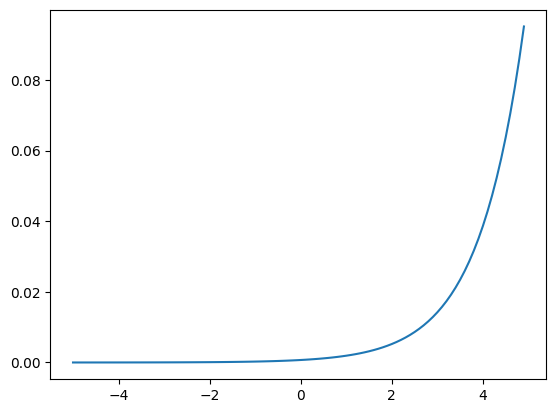

1.0

In [34]:
def softmax(x):
  c = np.max(x)
  exp_x = np.exp(x - c)
  sum_exp_x = np.sum(exp_x)
  return exp_x / sum_exp_x

x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.show() 

np.sum(y)

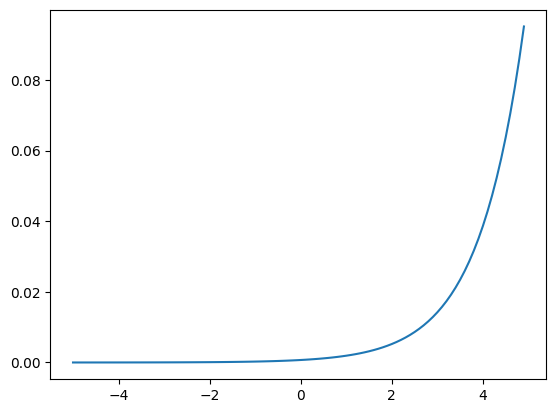

1.0

In [35]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T 

  x = x - np.max(x) # 溢出对策
  return np.exp(x) / np.sum(np.exp(x))

x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.show() 

np.sum(y)

求解机器学习问题的步骤可以分为“学习”和“推理”两个阶段。
推理阶段一般会省略输出层的softmax函数。在输出层使用softmax函数是因为它和神经网络的学习有关系

In [36]:
## 手写数字识别


In [37]:
import sys, os
from PIL import Image
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist


def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)
# 输出各个数据的形状
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)


(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


In [38]:
# coding: utf-8
# from common.functions import sigmoid, softmax
from dataset.mnist import load_mnist
import pickle
import numpy as np
import sys
import os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T 
  x = x - np.max(x) # 溢出对策
  return np.exp(x) / np.sum(np.exp(x))


def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test


def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network


def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)  # 获取概率最高的元素的索引
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352
